In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_curve,auc
from sklearn.pipeline import Pipeline




In [143]:
data=pd.read_csv("C:/Users/varsh/Downloads/archive/covtype.csv")

In [144]:
data.shape

(581012, 55)

In [145]:
data.columns


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [146]:
selected_columns = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area1',
    'Soil_Type1',
    'Soil_Type2',
    'Soil_Type3',
    'Soil_Type4', 
    'Soil_Type5',
    'Cover_Type'
]

df_selected = data[selected_columns]
df= df_selected.sample(n=5000, random_state=42)

print(df.head())


        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
250728       3351     206     27                               726   
246788       2732     129      7                               212   
407714       2572      24      9                               201   
25713        2824      69     13                               417   
21820        2529      84      5                               120   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
250728                             124                             3813   
246788                               1                             1082   
407714                              25                              957   
25713                               39                             3223   
21820                                9                             1092   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
250728            192             252            180   
246788          

In [147]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Cover_Type                            0
dtype: int64

In [148]:
df.duplicated().sum()

np.int64(0)

In [149]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Cover_Type                            0
dtype: int64

In [150]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Cover_Type
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2954.132000,156.121200,14.08560,268.228200,46.392000,2328.930600,211.833600,223.265000,142.898000,1986.116400,0.440800,0.00520,0.013600,0.007400,0.023800,0.003400,2.054400
std,278.959726,112.789168,7.45489,210.519184,59.848277,1536.918198,27.458614,19.176755,37.762288,1328.436777,0.496533,0.07193,0.115835,0.085713,0.152441,0.058216,1.401368
min,1920.000000,0.000000,0.00000,0.000000,-152.000000,0.000000,70.000000,98.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2804.000000,58.000000,9.00000,108.000000,7.000000,1110.000000,198.000000,213.000000,120.000000,1020.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2990.000000,127.000000,13.00000,218.000000,29.000000,1972.000000,218.000000,226.000000,142.000000,1721.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3156.000000,265.000000,18.00000,382.000000,66.000000,3262.750000,231.000000,237.000000,168.000000,2547.250000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3746.000000,359.000000,52.00000,1239.000000,536.000000,7078.000000,254.000000,254.000000,247.000000,6934.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7.000000


In [151]:
numerical_columns = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

df_num= df[numerical_columns]
scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num)

df_new= pd.DataFrame(df_num_scaled, columns=numerical_columns)

print(df_new.head())


   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.783680  0.573816  0.519231                          0.585956   
1   0.444688  0.359331  0.134615                          0.171106   
2   0.357065  0.066852  0.173077                          0.162228   
3   0.495071  0.192201  0.250000                          0.336562   
4   0.333516  0.233983  0.096154                          0.096852   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.401163                         0.538712   
1                        0.222384                         0.152868   
2                        0.257267                         0.135208   
3                        0.277616                         0.455355   
4                        0.234012                         0.154281   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.663043        0.987179       0.728745   
1       0.875000        0.884615       0.554656   
2    

In [152]:
df_new.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.566337,0.434878,0.270877,0.216488,0.288360,0.329038,0.770835,0.802981,0.578534,0.286432
std,0.152771,0.314176,0.143363,0.169911,0.086989,0.217140,0.149232,0.122928,0.152884,0.191583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.484118,0.161560,0.173077,0.087167,0.231105,0.156824,0.695652,0.737179,0.485830,0.147101
50%,0.585980,0.353760,0.250000,0.175948,0.263081,0.278610,0.804348,0.820513,0.574899,0.248197
75%,0.676889,0.738162,0.346154,0.308313,0.316860,0.460971,0.875000,0.891026,0.680162,0.367357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


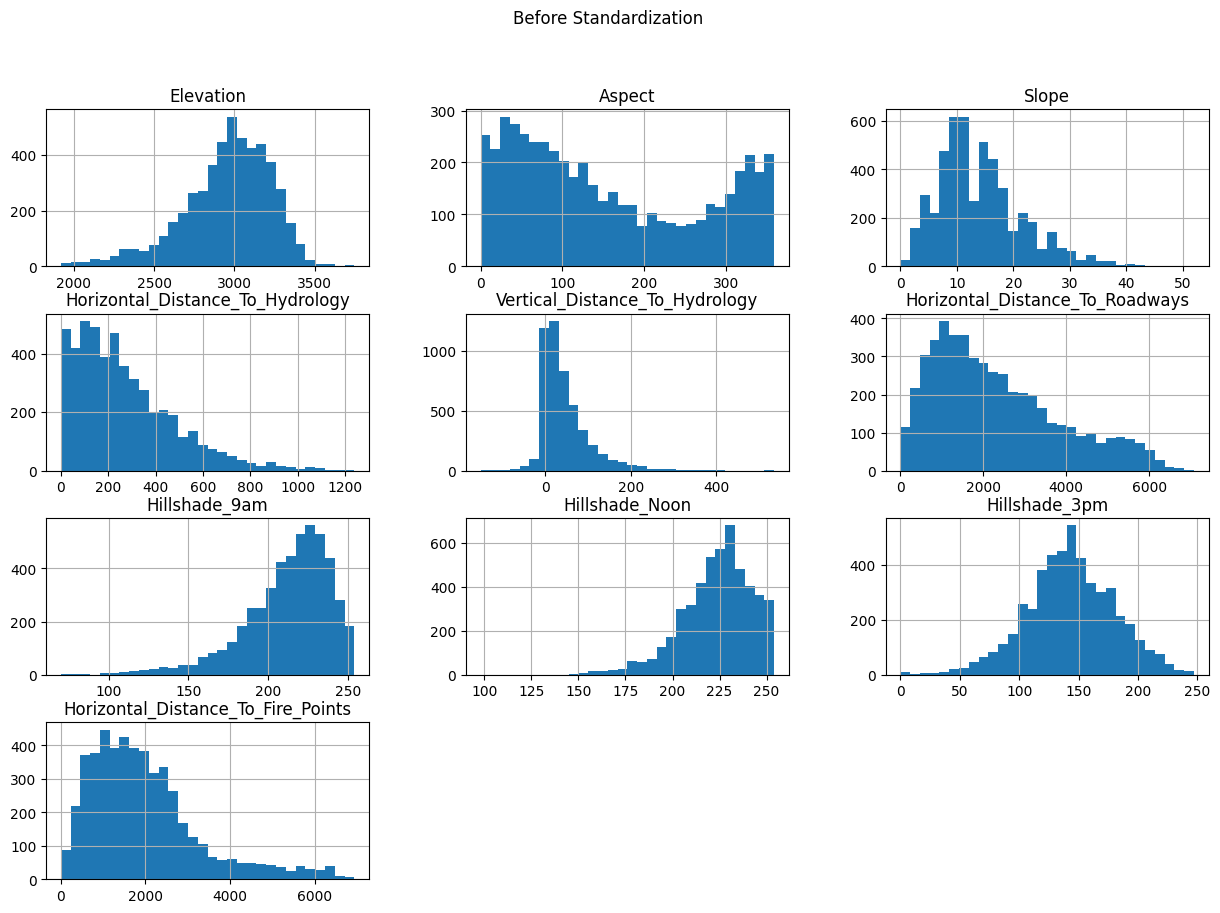

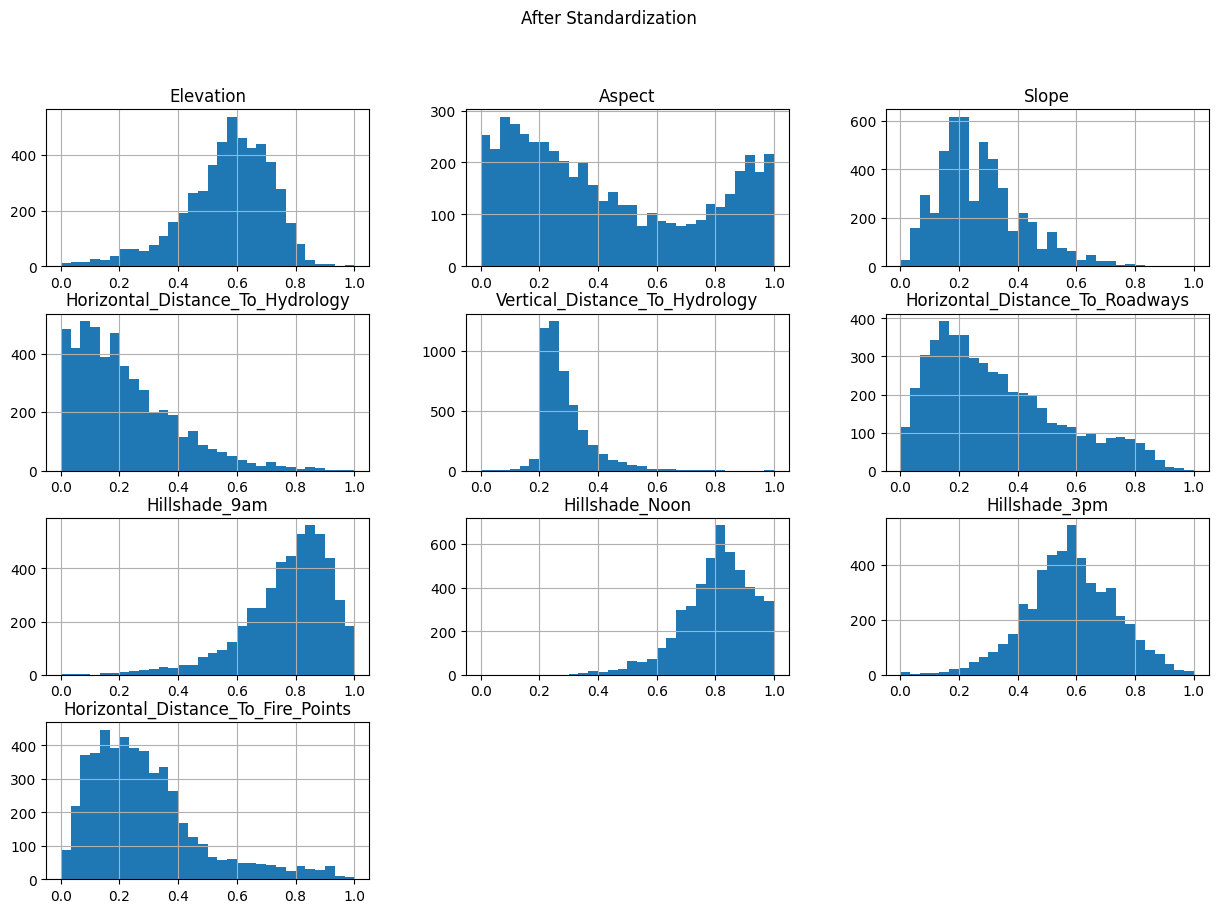

In [153]:
df[numerical_columns].hist(figsize=(15,10), bins=30)
plt.suptitle("Before Standardization")
plt.show()

df_new[numerical_columns].hist(figsize=(15,10), bins=30)
plt.suptitle("After Standardization")
plt.show()


In [154]:
X = df.drop('Cover_Type', axis=1)
y= df['Cover_Type']-1

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),      
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipelines = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
}

for name, pipe in pipelines.items():
    print(f"\n {name} ")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    y_proba = pipe.predict_proba(X_test)[:,1]
   
   



 Decision Tree 
Accuracy: 0.6530
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       367
           1       0.71      0.70      0.71       479
           2       0.64      0.61      0.62        64
           3       0.17      0.50      0.25         2
           4       0.31      0.29      0.30        17
           5       0.42      0.39      0.41        33
           6       0.54      0.50      0.52        38

    accuracy                           0.65      1000
   macro avg       0.49      0.52      0.49      1000
weighted avg       0.65      0.65      0.65      1000


 Random Forest 
Accuracy: 0.7380
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       367
           1       0.75      0.83      0.79       479
           2       0.69      0.72      0.70        64
           3       0.00      0.00      0.00         2
           4       0.75      0.18      0.29        17
          

In [156]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

pipexg= XGBClassifier(random_state=42, objective='multi:softmax', num_class=7)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=pipexg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Test Accuracy: 0.735
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       367
           1       0.75      0.81      0.78       479
           2       0.71      0.66      0.68        64
           3       0.33      0.50      0.40         2
           4       1.00      0.24      0.38        17
           5       0.50      0.36      0.42        33
           6       0.81      0.58      0.68        38

    accuracy                           0.73      1000
   macro avg       0.69      0.55      0.58      1000
weighted avg       0.74      0.73      0.73      1000



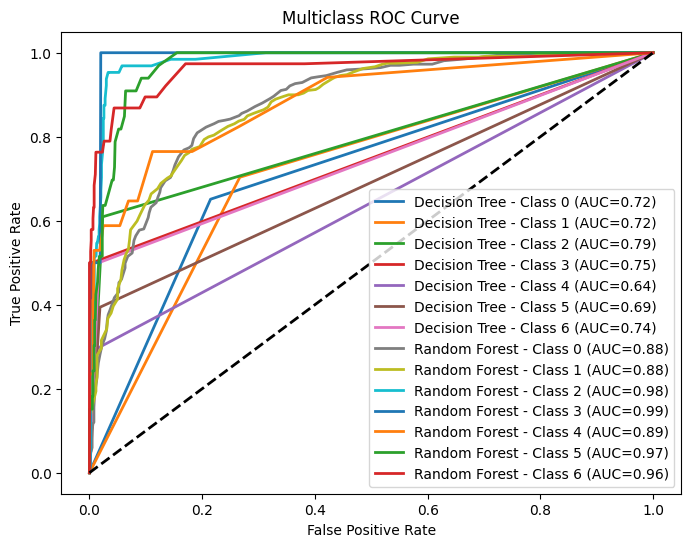

In [157]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

classes = np.unique(y)  
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_score = pipe.predict_proba(X_test)   

   
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, 
                 label=f"{name} - Class {classes[i]} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


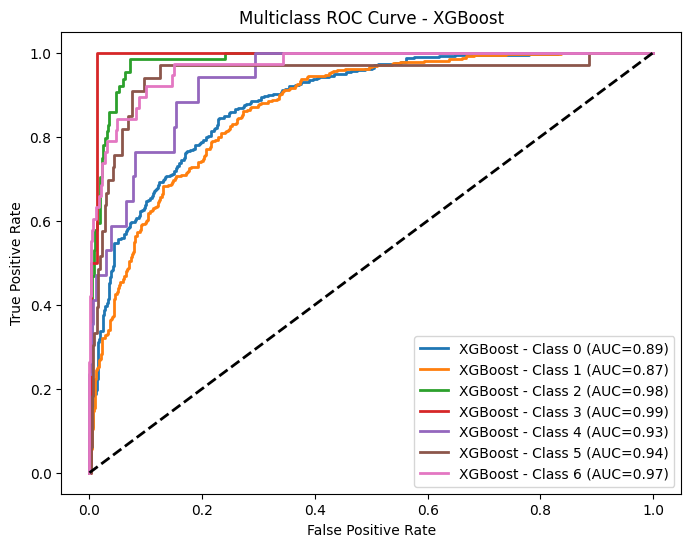

In [158]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_score = xgb_model.predict_proba(X_test)

classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"XGBoost - Class {classes[i]} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

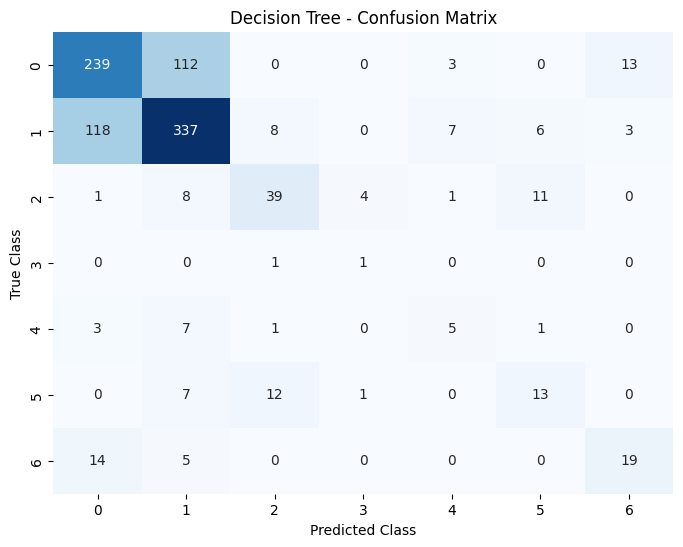

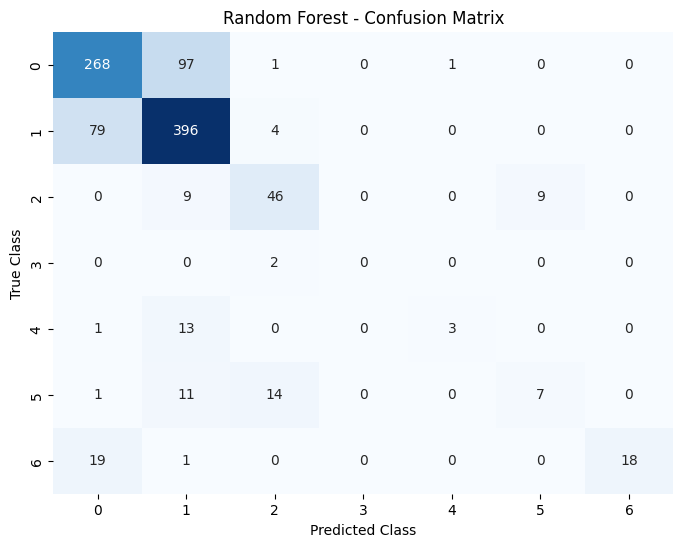

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
 
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()


In [164]:
all_columns = X.columns  

sample_data = {col: [0] for col in all_columns}  

sample_data['Elevation'] = [2785]
sample_data['Aspect'] = [155]
sample_data['Slope'] = [18]
sample_data['Horizontal_Distance_To_Hydrology'] = [242]
sample_data['Vertical_Distance_To_Hydrology'] = [118]
sample_data['Horizontal_Distance_To_Roadways'] = [3090]
sample_data['Hillshade_9am'] = [238]
sample_data['Hillshade_Noon'] = [238]
sample_data['Hillshade_3pm'] = [122]
sample_data['Horizontal_Distance_To_Fire_Points'] = [6211]
sample_data['Soil_Type3'] = [0]      
sample_data['Wilderness_Area1'] = [1] 

sample_df = pd.DataFrame(sample_data)[all_columns]
pipexg.fit(X_train, y_train)

prediction =pipexg.predict(sample_df)[0]
proba = pipexg.predict_proba(sample_df)[0]

print("Predicted Class (0-6):", prediction)
print("Prediction Probabilities:", proba)


Predicted Class (0-6): 1
Prediction Probabilities: [2.6572667e-02 9.7276402e-01 2.3476910e-04 2.9785215e-05 2.8192101e-04
 3.9844897e-05 7.6908298e-05]


Class distribution:
 Cover_Type
0    1841
1    2397
2     324
3      25
4      88
5     150
6     175
Name: count, dtype: int64


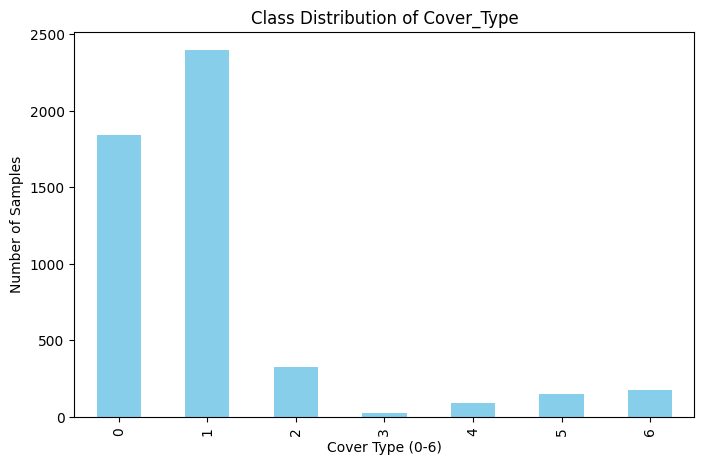

In [163]:
class_counts = y.value_counts().sort_index()
print("Class distribution:\n", class_counts)

# Optional: visualize as bar chart
plt.figure(figsize=(8,5))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cover Type (0-6)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Cover_Type")
plt.show()

In [165]:
import pickle
with open('xgb_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)